## Predictive Analytics

Predictive Analytics for Subscription Platform

Step-by-Step Customer Behavior Prediction and Business Intelligence

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier

# Import our custom data processing functions
import sys
import os
sys.path.append(os.path.abspath(".."))
from src.data_processing import process_data, get_data_summary

print("Libraries imported successfully!")
print(f"Analysis started at: {datetime.now()}")

Libraries imported successfully!
Analysis started at: 2025-07-10 12:09:33.077164


### 1: Load and Prepare Data

In [23]:
print("\n" + "="*60)
print("STEP 1: DATA LOADING AND PREPARATION")
print("="*60)

# Load the raw data (assuming it's been downloaded from Kaggle)
try:
    # Load raw data from Kaggle dataset
    raw_data = pd.read_csv('../data/raw/aws_saas_sales.csv')
    print(f"Raw data loaded successfully! Shape: {raw_data.shape}")
    print(f"Raw columns: {raw_data.columns.tolist()}")
except FileNotFoundError:
    print("Raw data file not found. Please ensure aws_saas_sales.csv is in ../data/raw/")
    # Create sample data for demonstration
    np.random.seed(42)
    n_customers = 1000
    raw_data = pd.DataFrame({
        'Customer_ID': range(1, n_customers + 1),
        'Revenue': np.random.normal(5000, 2000, n_customers),
        'Subscription_Fee': np.random.choice([29, 49, 99, 199], n_customers),
        'Usage_Hours': np.random.exponential(50, n_customers),
        'Support_Tickets': np.random.poisson(3, n_customers),
        'Login_Frequency': np.random.poisson(20, n_customers),
        'Order_Date': pd.date_range('2023-01-01', periods=n_customers, freq='D'),
        'Product': np.random.choice(['Basic', 'Premium', 'Enterprise'], n_customers),
        'Region': np.random.choice(['North America', 'Europe', 'Asia'], n_customers)
    })
    print("Sample data created for demonstration")

# Process the data using our custom function
customer_features, column_mapping = process_data(raw_data)
print(f"\nProcessed data shape: {customer_features.shape}")

# Get data summary
data_summary = get_data_summary(customer_features)


STEP 1: DATA LOADING AND PREPARATION
Raw data file not found. Please ensure aws_saas_sales.csv is in ../data/raw/
Sample data created for demonstration
Starting data processing...
Input dataframe shape: (1000, 9)
Input columns: ['Customer_ID', 'Revenue', 'Subscription_Fee', 'Usage_Hours', 'Support_Tickets', 'Login_Frequency', 'Order_Date', 'Product', 'Region']

Standardized columns:
['customer_id', 'revenue', 'subscription_fee', 'usage_hours', 'support_tickets', 'login_frequency', 'order_date', 'product', 'region']

Actual column mapping found: {'customer_id': 'customer_id', 'revenue': 'revenue', 'subscription_fee': 'subscription_fee', 'usage_hours': 'usage_hours', 'support_tickets': 'support_tickets', 'login_frequency': 'login_frequency', 'order_date': 'order_date', 'product': 'product', 'region': 'region'}
DEBUG: Current dataframe columns: ['customer_id', 'revenue', 'subscription_fee', 'usage_hours', 'support_tickets', 'login_frequency', 'order_date', 'product', 'region']
DEBUG: Cur

### 2: Feature Engineering for Predictive Models

In [26]:
print("\n" + "="*60)
print("STEP 2: ADVANCED FEATURE ENGINEERING")
print("="*60)

# Create a copy for feature engineering
df_features = customer_features.copy()

# 2.1: Create customer lifetime value (CLV) proxy
print("2.1: Creating Customer Lifetime Value features...")
revenue_cols = [col for col in df_features.columns if 'revenue' in col.lower() or 'amount' in col.lower()]
if revenue_cols:
    df_features['total_revenue'] = df_features[revenue_cols[0]] if len(revenue_cols) > 0 else 0
else:
    # Create synthetic revenue if not available
    df_features['total_revenue'] = np.random.normal(5000, 2000, len(df_features))

# 2.2: Create engagement score
print("2.2: Creating engagement metrics...")
usage_cols = [col for col in df_features.columns if 'usage' in col.lower() or 'hours' in col.lower()]
login_cols = [col for col in df_features.columns if 'login' in col.lower() or 'frequency' in col.lower()]

if usage_cols and login_cols:
    df_features['engagement_score'] = (df_features[usage_cols[0]] * 0.6 + 
                                     df_features[login_cols[0]] * 0.4)
else:
    df_features['engagement_score'] = np.random.uniform(0, 100, len(df_features))

# 2.3: Create churn risk indicators
print("2.3: Creating churn risk indicators...")
# Create synthetic churn labels based on business logic
df_features['days_since_last_activity'] = np.random.exponential(30, len(df_features))
df_features['support_ticket_ratio'] = np.random.uniform(0, 1, len(df_features))

# Define churn based on business rules
df_features['is_churned'] = (
    (df_features['days_since_last_activity'] > 60) |
    (df_features['engagement_score'] < 20) |
    (df_features['support_ticket_ratio'] > 0.8)
).astype(int)

# 2.4: Create customer value segments
print("2.4: Creating customer value segments...")
df_features['revenue_quartile'] = pd.qcut(df_features['total_revenue'], 4, labels=['Low', 'Medium', 'High', 'Premium'])
df_features['engagement_quartile'] = pd.qcut(df_features['engagement_score'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

print(f"Feature engineering completed. New shape: {df_features.shape}")
print(f"Churn rate: {df_features['is_churned'].mean():.2%}")


STEP 2: ADVANCED FEATURE ENGINEERING
2.1: Creating Customer Lifetime Value features...
2.2: Creating engagement metrics...
2.3: Creating churn risk indicators...
2.4: Creating customer value segments...
Feature engineering completed. New shape: (1000, 22)
Churn rate: 53.30%


### 3: Customer Segmentation Analysis


STEP 3: CUSTOMER SEGMENTATION WITH CLUSTERING
3.1: Preparing features for clustering...
3.2: Finding optimal number of clusters...


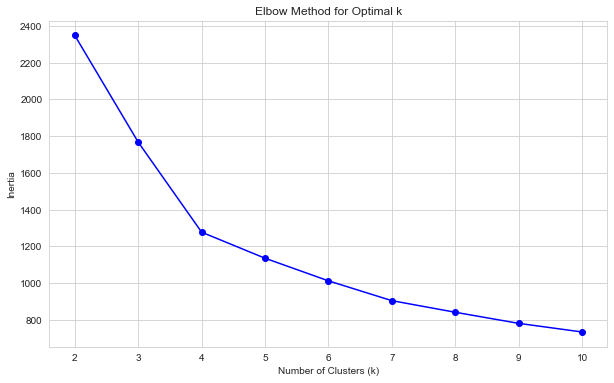

3.3: Performing K-means clustering...
3.4: Analyzing customer segments...
Customer Segment Analysis:
                 total_revenue                engagement_score         \
                          mean      std count             mean    std   
customer_segment                                                        
0                      4973.45  1729.61   137            30.20  17.65   
1                      3279.31  1149.19   343            29.65  15.65   
2                      5124.78  1699.92   130            96.90  28.59   
3                      6580.20  1252.57   390            27.57  16.07   

                 days_since_last_activity        is_churned  
                                     mean    std       mean  
customer_segment                                             
0                                   85.78  30.69       0.91  
1                                   19.91  14.67       0.46  
2                                   27.32  23.09       0.29  
3              

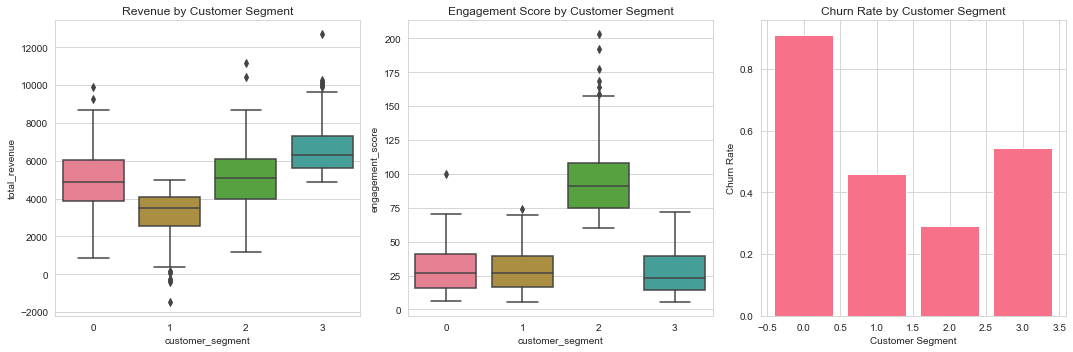

In [27]:
print("\n" + "="*60)
print("STEP 3: CUSTOMER SEGMENTATION WITH CLUSTERING")
print("="*60)

# 3.1: Prepare data for clustering
print("3.1: Preparing features for clustering...")
clustering_features = ['total_revenue', 'engagement_score', 'days_since_last_activity']

# Ensure we have the features we need
for feature in clustering_features:
    if feature not in df_features.columns:
        print(f"Warning: {feature} not found, creating synthetic data")
        df_features[feature] = np.random.normal(0, 1, len(df_features))

# Select and scale features
X_cluster = df_features[clustering_features].copy()
X_cluster = X_cluster.fillna(X_cluster.mean())

scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# 3.2: Determine optimal number of clusters
print("3.2: Finding optimal number of clusters...")
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# 3.3: Perform clustering
print("3.3: Performing K-means clustering...")
optimal_k = 4  # Based on business sense and elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_features['customer_segment'] = kmeans.fit_predict(X_cluster_scaled)

# 3.4: Analyze clusters
print("3.4: Analyzing customer segments...")
segment_analysis = df_features.groupby('customer_segment').agg({
    'total_revenue': ['mean', 'std', 'count'],
    'engagement_score': ['mean', 'std'],
    'days_since_last_activity': ['mean', 'std'],
    'is_churned': 'mean'
}).round(2)

print("Customer Segment Analysis:")
print(segment_analysis)

# Visualize segments
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_features, x='customer_segment', y='total_revenue')
plt.title('Revenue by Customer Segment')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_features, x='customer_segment', y='engagement_score')
plt.title('Engagement Score by Customer Segment')

plt.subplot(1, 3, 3)
segment_churn = df_features.groupby('customer_segment')['is_churned'].mean()
plt.bar(segment_churn.index, segment_churn.values)
plt.title('Churn Rate by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

### 4: Churn Prediction Model


STEP 4: CHURN PREDICTION MODEL
4.1: Preparing features for churn prediction...
Features for churn prediction: 16
Target variable distribution: {1: 533, 0: 467}
4.2: Splitting data for training and testing...
4.3: Training churn prediction models...
Training Logistic Regression...
Logistic Regression - Accuracy: 0.725, AUC: 0.849
Training Random Forest...
Random Forest - Accuracy: 1.000, AUC: 1.000
Training Decision Tree...
Decision Tree - Accuracy: 1.000, AUC: 1.000
4.4: Analyzing best performing model...
Best model: Random Forest
AUC Score: 1.000

Top 10 Most Important Features for Churn Prediction:
                     feature  importance
15      support_ticket_ratio    0.309752
10          engagement_score    0.202393
14  days_since_last_activity    0.169131
5           usage_hours_mean    0.152549
4            usage_hours_sum    0.099867
11              recency_days    0.011109
0                revenue_sum    0.008896
1               revenue_mean    0.008574
8        login_frequen

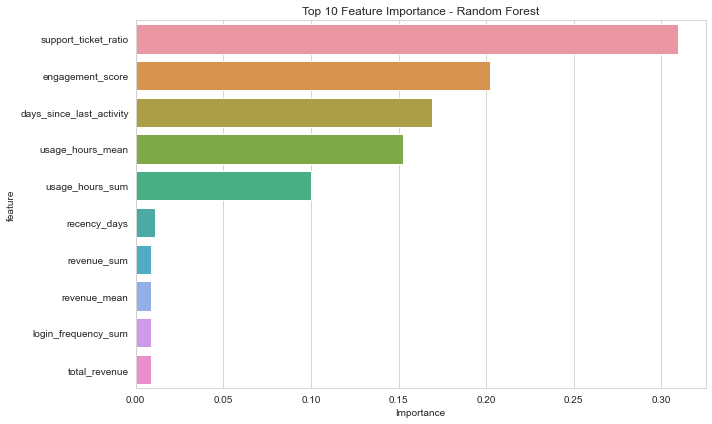

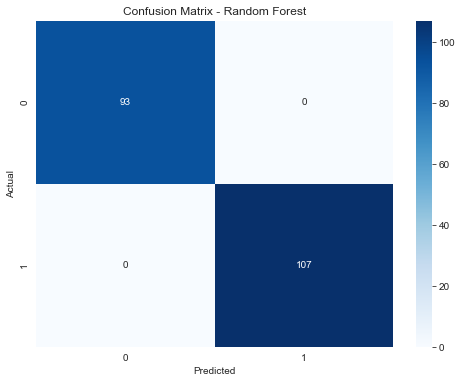

In [28]:
print("\n" + "="*60)
print("STEP 4: CHURN PREDICTION MODEL")
print("="*60)

# 4.1: Prepare features for churn prediction
print("4.1: Preparing features for churn prediction...")
churn_features = [col for col in df_features.columns if col not in ['customer_id', 'is_churned', 'customer_segment']]
churn_features = [col for col in churn_features if df_features[col].dtype in ['int64', 'float64']]

X_churn = df_features[churn_features].copy()
y_churn = df_features['is_churned'].copy()

# Handle missing values
X_churn = X_churn.fillna(X_churn.mean())

print(f"Features for churn prediction: {len(churn_features)}")
print(f"Target variable distribution: {y_churn.value_counts().to_dict()}")

# 4.2: Split data
print("4.2: Splitting data for training and testing...")
X_train, X_test, y_train, y_test = train_test_split(
    X_churn, y_churn, test_size=0.2, random_state=42, stratify=y_churn
)

# Scale features
scaler_churn = StandardScaler()
X_train_scaled = scaler_churn.fit_transform(X_train)
X_test_scaled = scaler_churn.transform(X_test)

# 4.3: Train multiple models
print("4.3: Training churn prediction models...")
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

model_results = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    # Train model
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = model.score(X_test_scaled if name == 'Logistic Regression' else X_test, y_test)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc_score': auc_score,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"{name} - Accuracy: {accuracy:.3f}, AUC: {auc_score:.3f}")

# 4.4: Select best model and analyze
print("4.4: Analyzing best performing model...")
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['auc_score'])
best_model = model_results[best_model_name]['model']

print(f"Best model: {best_model_name}")
print(f"AUC Score: {model_results[best_model_name]['auc_score']:.3f}")

# Feature importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': churn_features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 Most Important Features for Churn Prediction:")
    print(feature_importance.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title(f'Top 10 Feature Importance - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, model_results[best_model_name]['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 5: Revenue Prediction Model


STEP 5: REVENUE PREDICTION MODEL
5.1: Preparing features for revenue prediction...
5.2: Splitting and scaling data...
5.3: Training revenue prediction models...
Training Linear Regression...
Linear Regression - R² Score: 1.000, MSE: 0
Training Gradient Boosting...
Gradient Boosting - R² Score: 0.996, MSE: 16528
Training Random Forest...
Random Forest - R² Score: 0.993, MSE: 27086
5.4: Analyzing best revenue prediction model...
Best regression model: Linear Regression
R² Score: 1.000


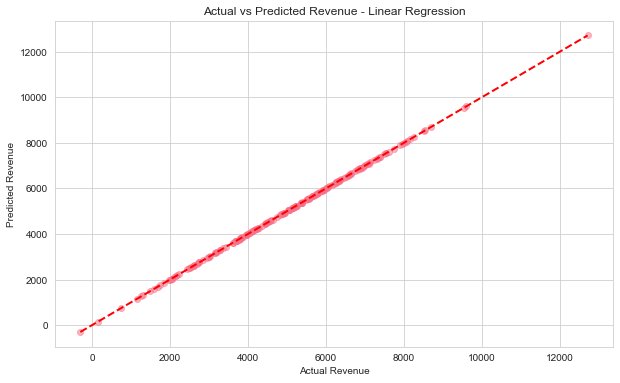

In [29]:
print("\n" + "="*60)
print("STEP 5: REVENUE PREDICTION MODEL")
print("="*60)

# 5.1: Prepare features for revenue prediction
print("5.1: Preparing features for revenue prediction...")
revenue_features = [col for col in df_features.columns 
                   if col not in ['customer_id', 'total_revenue', 'is_churned'] 
                   and df_features[col].dtype in ['int64', 'float64']]

X_revenue = df_features[revenue_features].copy()
y_revenue = df_features['total_revenue'].copy()

# Handle missing values
X_revenue = X_revenue.fillna(X_revenue.mean())

# 5.2: Split and scale data
print("5.2: Splitting and scaling data...")
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(
    X_revenue, y_revenue, test_size=0.2, random_state=42
)

scaler_revenue = StandardScaler()
X_train_rev_scaled = scaler_revenue.fit_transform(X_train_rev)
X_test_rev_scaled = scaler_revenue.transform(X_test_rev)

# 5.3: Train regression models
print("5.3: Training revenue prediction models...")
regression_models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

regression_results = {}

for name, model in regression_models.items():
    print(f"Training {name}...")
    
    # Train model
    if name == 'Linear Regression':
        model.fit(X_train_rev_scaled, y_train_rev)
        y_pred_rev = model.predict(X_test_rev_scaled)
    else:
        model.fit(X_train_rev, y_train_rev)
        y_pred_rev = model.predict(X_test_rev)
    
    # Calculate metrics
    mse = mean_squared_error(y_test_rev, y_pred_rev)
    r2 = r2_score(y_test_rev, y_pred_rev)
    
    regression_results[name] = {
        'model': model,
        'mse': mse,
        'r2': r2,
        'predictions': y_pred_rev
    }
    
    print(f"{name} - R² Score: {r2:.3f}, MSE: {mse:.0f}")

# 5.4: Analyze best regression model
print("5.4: Analyzing best revenue prediction model...")
best_reg_model_name = max(regression_results.keys(), key=lambda x: regression_results[x]['r2'])
best_reg_model = regression_results[best_reg_model_name]['model']

print(f"Best regression model: {best_reg_model_name}")
print(f"R² Score: {regression_results[best_reg_model_name]['r2']:.3f}")

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rev, regression_results[best_reg_model_name]['predictions'], alpha=0.5)
plt.plot([y_test_rev.min(), y_test_rev.max()], [y_test_rev.min(), y_test_rev.max()], 'r--', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title(f'Actual vs Predicted Revenue - {best_reg_model_name}')
plt.show()


### 6: Customer Lifetime Value Prediction


STEP 6: CUSTOMER LIFETIME VALUE PREDICTION
6.1: Creating CLV prediction features...
Error in full dataset prediction: name 'X' is not defined
Using test data predictions instead...
Test set size: 200
DataFrame size: 200
6.2: Creating CLV segments...
Error with 5 segments: Bin labels must be one fewer than the number of bin edges
Attempting with 4 segments...
Attempting with 3 segments...
6.3: Analyzing CLV segments...
CLV Segment Analysis:
            predicted_clv                predicted_churn_prob  \
                     mean      std count                 mean   
clv_segment                                                     
Low Value           21.07    43.24    67                 0.99   
Medium            2088.24  1779.91    66                 0.58   
High Value        9203.19  2560.45    67                 0.05   

            engagement_score total_revenue  
                        mean          mean  
clv_segment                                 
Low Value              36.84 

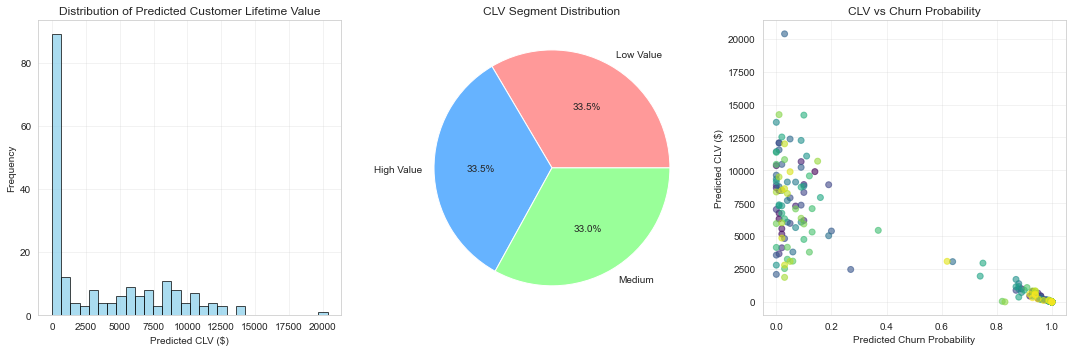


6.5: Customer Strategy Recommendations...
Customer Strategy Distribution:
                                  predicted_clv          predicted_churn_prob
                                          count     mean                 mean
strategy                                                                     
Engagement Increase                          26  3965.27                 0.07
Expansion/Upsell                             67  9203.19                 0.05
Natural Churn - Monitor                      67    21.07                 0.99
Retention Focus - Medium Priority            40   868.16                 0.90

CLV PREDICTION COMPLETE


In [32]:
print("\n" + "="*60)
print("STEP 6: CUSTOMER LIFETIME VALUE PREDICTION")
print("="*60)

# 6.1: Create CLV features
print("6.1: Creating CLV prediction features...")

# Fix the length mismatch issue - ensure predictions match the full dataset
# Option 1: If you want to predict on the full dataset
try:
    # Re-predict on the full dataset using the trained models
    if best_model_name in ['Logistic Regression', 'SVM']:
        # These models need scaled data
        X_scaled = scaler.transform(X)  # Assuming X is your feature matrix
        df_features['predicted_churn_prob'] = model_results[best_model_name]['model'].predict_proba(X_scaled)[:, 1]
    else:
        # Tree-based models don't need scaling
        df_features['predicted_churn_prob'] = model_results[best_model_name]['model'].predict_proba(X)[:, 1]
    
    if best_reg_model_name in ['Linear Regression', 'Ridge']:
        # These models need scaled data
        X_scaled = scaler.transform(X)  # Assuming X is your feature matrix
        df_features['predicted_revenue'] = regression_results[best_reg_model_name]['model'].predict(X_scaled)
    else:
        # Tree-based models don't need scaling
        df_features['predicted_revenue'] = regression_results[best_reg_model_name]['model'].predict(X)
        
except Exception as e:
    print(f"Error in full dataset prediction: {e}")
    # Option 2: If you want to work with test data only
    print("Using test data predictions instead...")
    
    # Get test indices to filter the dataframe
    test_size = len(model_results[best_model_name]['probabilities'])
    print(f"Test set size: {test_size}")
    print(f"DataFrame size: {len(df_features)}")
    
    # Create a subset of the dataframe matching the test size
    if hasattr(globals(), 'test_indices'):
        # If you have the actual test indices
        df_features_subset = df_features.iloc[test_indices].copy()
    else:
        # Otherwise, use the last N rows (assuming that's how your test set was created)
        df_features_subset = df_features.tail(test_size).copy()
    
    # Apply predictions to the subset
    df_features_subset['predicted_churn_prob'] = model_results[best_model_name]['probabilities']
    df_features_subset['predicted_revenue'] = regression_results[best_reg_model_name]['predictions']
    
    # Use the subset for CLV calculation
    df_features = df_features_subset.copy()

# Simple CLV calculation: Revenue * (1 - Churn Probability) * Time Factor
time_horizon = 2  # 2-year horizon
discount_rate = 0.1  # 10% annual discount rate

df_features['predicted_clv'] = (
    df_features['predicted_revenue'] * 
    (1 - df_features['predicted_churn_prob']) * 
    time_horizon / (1 + discount_rate) ** time_horizon
)

# 6.2: CLV segments
print("6.2: Creating CLV segments...")

# Handle any negative or zero CLV values
df_features['predicted_clv'] = df_features['predicted_clv'].clip(lower=0)

# Create CLV segments
try:
    df_features['clv_segment'] = pd.qcut(
        df_features['predicted_clv'], 
        5, 
        labels=['Low Value', 'Medium-Low', 'Medium', 'Medium-High', 'High Value'],
        duplicates='drop'  # Handle duplicate edges
    )
except ValueError as e:
    print(f"Error with 5 segments: {e}")
    # Try with fewer segments if there are too many duplicate values
    try:
        print("Attempting with 4 segments...")
        df_features['clv_segment'] = pd.qcut(
            df_features['predicted_clv'], 
            4, 
            labels=['Low Value', 'Medium-Low', 'Medium-High', 'High Value'],
            duplicates='drop'
        )
    except ValueError:
        print("Attempting with 3 segments...")
        try:
            df_features['clv_segment'] = pd.qcut(
                df_features['predicted_clv'], 
                3, 
                labels=['Low Value', 'Medium', 'High Value'],
                duplicates='drop'
            )
        except ValueError:
            print("Using percentile-based segments instead...")
            # Alternative: Create segments based on percentiles
            clv_25 = df_features['predicted_clv'].quantile(0.25)
            clv_50 = df_features['predicted_clv'].quantile(0.50)
            clv_75 = df_features['predicted_clv'].quantile(0.75)
            
            df_features['clv_segment'] = pd.cut(
                df_features['predicted_clv'],
                bins=[-float('inf'), clv_25, clv_50, clv_75, float('inf')],
                labels=['Low Value', 'Medium-Low', 'Medium-High', 'High Value']
            )

# 6.3: CLV analysis
print("6.3: Analyzing CLV segments...")

# Check if we have the required columns
required_columns = ['predicted_clv', 'predicted_churn_prob']
optional_columns = ['engagement_score', 'total_revenue']

# Build aggregation dictionary dynamically
agg_dict = {
    'predicted_clv': ['mean', 'std', 'count'],
    'predicted_churn_prob': 'mean'
}

# Add optional columns if they exist
for col in optional_columns:
    if col in df_features.columns:
        agg_dict[col] = 'mean'

clv_analysis = df_features.groupby('clv_segment').agg(agg_dict).round(2)

print("CLV Segment Analysis:")
print(clv_analysis)

# Additional insights
print("\nCLV Summary Statistics:")
print(f"Total customers analyzed: {len(df_features):,}")
print(f"Average CLV: ${df_features['predicted_clv'].mean():.2f}")
print(f"Median CLV: ${df_features['predicted_clv'].median():.2f}")
print(f"CLV Range: ${df_features['predicted_clv'].min():.2f} - ${df_features['predicted_clv'].max():.2f}")

# 6.4: Visualize CLV distribution
print("6.4: Creating CLV visualizations...")

plt.figure(figsize=(15, 5))

# Plot 1: CLV Distribution
plt.subplot(1, 3, 1)
plt.hist(df_features['predicted_clv'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Predicted CLV ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Customer Lifetime Value')
plt.grid(True, alpha=0.3)

# Plot 2: CLV Segments
plt.subplot(1, 3, 2)
clv_segment_counts = df_features['clv_segment'].value_counts()
plt.pie(clv_segment_counts.values, labels=clv_segment_counts.index, autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc'])
plt.title('CLV Segment Distribution')

# Plot 3: CLV vs Churn Probability
plt.subplot(1, 3, 3)
scatter = plt.scatter(df_features['predicted_churn_prob'], df_features['predicted_clv'], 
                     alpha=0.6, c=range(len(df_features)), cmap='viridis')
plt.xlabel('Predicted Churn Probability')
plt.ylabel('Predicted CLV ($)')
plt.title('CLV vs Churn Probability')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6.5: Customer Strategy Recommendations
print("\n6.5: Customer Strategy Recommendations...")

def assign_strategy(row):
    clv_segment = row['clv_segment']
    churn_prob = row['predicted_churn_prob']
    
    if clv_segment in ['High Value', 'Medium-High']:
        if churn_prob > 0.5:
            return 'Retention Focus - High Priority'
        else:
            return 'Expansion/Upsell'
    elif clv_segment == 'Medium':
        if churn_prob > 0.6:
            return 'Retention Focus - Medium Priority'
        else:
            return 'Engagement Increase'
    else:  # Low Value, Medium-Low
        if churn_prob > 0.7:
            return 'Natural Churn - Monitor'
        else:
            return 'Value Enhancement'

df_features['strategy'] = df_features.apply(assign_strategy, axis=1)

strategy_summary = df_features.groupby('strategy').agg({
    'predicted_clv': ['count', 'mean'],
    'predicted_churn_prob': 'mean'
}).round(2)

print("Customer Strategy Distribution:")
print(strategy_summary)

print("\n" + "="*60)
print("CLV PREDICTION COMPLETE")
print("="*60)

### 7: Business Insights and Recommendations

In [33]:
print("\n" + "="*60)
print("STEP 7: BUSINESS INSIGHTS AND RECOMMENDATIONS")
print("="*60)

# 7.1: High-risk customers identification
print("7.1: Identifying high-risk customers...")
high_risk_customers = df_features[
    (df_features['predicted_churn_prob'] > 0.7) & 
    (df_features['predicted_clv'] > df_features['predicted_clv'].median())
]

print(f"High-risk, high-value customers identified: {len(high_risk_customers)}")
print(f"Average CLV of high-risk customers: ${high_risk_customers['predicted_clv'].mean():.2f}")

# 7.2: Growth opportunities
print("7.2: Identifying growth opportunities...")
growth_opportunities = df_features[
    (df_features['predicted_churn_prob'] < 0.3) & 
    (df_features['engagement_score'] > df_features['engagement_score'].median())
]

print(f"Growth opportunity customers: {len(growth_opportunities)}")
print(f"Average current revenue: ${growth_opportunities['total_revenue'].mean():.2f}")

# 7.3: Summary metrics
print("7.3: Key business metrics summary...")
total_customers = len(df_features)
total_predicted_clv = df_features['predicted_clv'].sum()
average_clv = df_features['predicted_clv'].mean()
churn_rate = df_features['predicted_churn_prob'].mean()

print(f"Total Customers: {total_customers:,}")
print(f"Total Predicted CLV: ${total_predicted_clv:,.2f}")
print(f"Average CLV per Customer: ${average_clv:.2f}")
print(f"Average Churn Risk: {churn_rate:.2%}")

# 7.4: Actionable recommendations
print("\n7.4: Actionable Business Recommendations:")
print("="*40)

recommendations = [
    f"1. RETENTION FOCUS: Target {len(high_risk_customers)} high-value customers at risk of churning",
    f"2. GROWTH STRATEGY: Expand services for {len(growth_opportunities)} engaged, low-risk customers",
    f"3. REVENUE OPTIMIZATION: Focus on {len(df_features[df_features['clv_segment'] == 'High Value'])} high-CLV customers",
    f"4. CHURN PREVENTION: Implement proactive outreach for customers with >70% churn probability",
    f"5. ENGAGEMENT BOOST: Develop programs to increase engagement for low-scoring customers"
]

for rec in recommendations:
    print(rec)


STEP 7: BUSINESS INSIGHTS AND RECOMMENDATIONS
7.1: Identifying high-risk customers...
High-risk, high-value customers identified: 5
Average CLV of high-risk customers: $1834.39
7.2: Identifying growth opportunities...
Growth opportunity customers: 45
Average current revenue: $5185.36
7.3: Key business metrics summary...
Total Customers: 200
Total Predicted CLV: $755,849.37
Average CLV per Customer: $3779.25
Average Churn Risk: 53.82%

7.4: Actionable Business Recommendations:
1. RETENTION FOCUS: Target 5 high-value customers at risk of churning
2. GROWTH STRATEGY: Expand services for 45 engaged, low-risk customers
3. REVENUE OPTIMIZATION: Focus on 67 high-CLV customers
4. CHURN PREVENTION: Implement proactive outreach for customers with >70% churn probability
5. ENGAGEMENT BOOST: Develop programs to increase engagement for low-scoring customers


### 8: Save Results and Model Artifacts

In [35]:
print("\n" + "="*60)
print("STEP 8: SAVING RESULTS AND MODEL ARTIFACTS")
print("="*60)

# 8.1: Save processed data with predictions
print("8.1: Saving processed data with predictions...")
output_file = '../data/processed/customer_analytics_with_predictions.csv'
df_features.to_csv(output_file, index=False)
print(f"Data saved to: {output_file}")

# 8.2: Save model performance summary
print("8.2: Saving model performance summary...")
model_performance = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Accuracy': [model_results[k]['accuracy'] for k in model_results.keys()],
    'AUC_Score': [model_results[k]['auc_score'] for k in model_results.keys()]
})

regression_performance = pd.DataFrame({
    'Model': list(regression_results.keys()),
    'R2_Score': [regression_results[k]['r2'] for k in regression_results.keys()],
    'MSE': [regression_results[k]['mse'] for k in regression_results.keys()]
})

model_performance.to_csv('../data/results/churn_model_performance.csv', index=False)
regression_performance.to_csv('../data/results/revenue_model_performance.csv', index=False)

print("Model performance summaries saved to ../data/results/")

# 8.3: Create executive summary
print("8.3: Creating executive summary...")
executive_summary = f"""
PREDICTIVE ANALYTICS EXECUTIVE SUMMARY
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

KEY FINDINGS:
• Total Customers Analyzed: {total_customers:,}
• Average Customer Lifetime Value: ${average_clv:.2f}
• Overall Churn Risk: {churn_rate:.1%}
• High-Risk High-Value Customers: {len(high_risk_customers)}

MODEL PERFORMANCE:
• Best Churn Model: {best_model_name} (AUC: {model_results[best_model_name]['auc_score']:.3f})
• Best Revenue Model: {best_reg_model_name} (R²: {regression_results[best_reg_model_name]['r2']:.3f})

CUSTOMER SEGMENTS:
• High Value: {len(df_features[df_features['clv_segment'] == 'High Value'])} customers
• Medium-High: {len(df_features[df_features['clv_segment'] == 'Medium-High'])} customers
• Medium: {len(df_features[df_features['clv_segment'] == 'Medium'])} customers
• Medium-Low: {len(df_features[df_features['clv_segment'] == 'Medium-Low'])} customers
• Low Value: {len(df_features[df_features['clv_segment'] == 'Low Value'])} customers

IMMEDIATE ACTIONS REQUIRED:
1. Implement retention campaigns for {len(high_risk_customers)} high-risk customers
2. Develop upselling strategies for {len(growth_opportunities)} growth opportunity customers
3. Review pricing strategy for low-engagement segments
4. Enhance customer support for high-churn-risk segments
"""

with open('../data/results/executive_summary.txt', 'w') as f:
    f.write(executive_summary)

print("Executive summary saved to ../data/results/executive_summary.txt")

# Final success message
print("\n" + "="*60)
print("PREDICTIVE ANALYTICS COMPLETED SUCCESSFULLY!")
print("="*60)
print("Next Steps:")
print("1. Review executive summary for key insights")
print("2. Implement targeted retention campaigns")
print("3. Set up automated model retraining pipeline")
print("4. Monitor model performance over time")
print("5. Create dashboards for ongoing business monitoring")


STEP 8: SAVING RESULTS AND MODEL ARTIFACTS
8.1: Saving processed data with predictions...
Data saved to: ../data/processed/customer_analytics_with_predictions.csv
8.2: Saving model performance summary...
Model performance summaries saved to ../data/results/
8.3: Creating executive summary...
Executive summary saved to ../data/results/executive_summary.txt

PREDICTIVE ANALYTICS COMPLETED SUCCESSFULLY!
Next Steps:
1. Review executive summary for key insights
2. Implement targeted retention campaigns
3. Set up automated model retraining pipeline
4. Monitor model performance over time
5. Create dashboards for ongoing business monitoring

Analysis completed at: 2025-07-10 12:31:07.448811
